In [346]:
import pandas as pd
import numpy as np
from datetime import datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -q holidays
import holidays

!pip install -q meteostat
from meteostat import Point, Daily

In [347]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# **FUNCTIONS**

## **Set Plot Style**

In [350]:
def set_plot_style():
    # Background colors
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor="0.85")
    
    # Hiding grid
    plt.grid(False)
    
    # Setting only left and bottom spines as visible
    ax = plt.gca()
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Spines color
    ax.spines['bottom'].set_color("black")
    ax.spines['left'].set_color("black")
    
    # Plot size
    plt.gcf().set_size_inches(6, 5)

## **Scatter Plot**

In [352]:
def PlotScatter(x, y, title, xunit, yunit, x_size):
    set_plot_style()
    
    plt.title(title)
    plt.scatter(x, y, alpha=0.7)

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(1.05, -0.025)
    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    if (x_size == 0):
        plt.gcf().set_size_inches(6, 5)
    else:
        plt.gcf().set_size_inches(x_size, 5)
    plt.show()
    plt.close()

## **Box Plot**

In [354]:
def PlotBoxPlotV3(df_x, df_y, title, size_x, size_y, save):
    set_plot_style()

    plt.title(title)
    sns.boxplot(x = df_x, y = df_y, palette = "mako")

    plt.xlabel("")
    plt.ylabel("")

    plt.gcf().set_size_inches(size_x, size_y)

    if (save != ""):
        plt.savefig(save)

    plt.show()
    plt.close()

In [355]:
def PlotBoxPlotV3_y(df_y, title, size_x, size_y, save):
    set_plot_style()

    plt.title(title)
    sns.boxplot(y = df_y, palette = "mako")

    plt.xlabel("")
    plt.ylabel("")

    plt.gcf().set_size_inches(size_x, size_y)

    #plt.ylim(0,)

    if (save != ""):
        plt.savefig(save)

    plt.show()
    plt.close()

## **IQR Outlier Method**

In [357]:
def IQR_Method(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

## **Regression Plot**

In [359]:
def PlotRegPlot(df_x, df_y, title, xunit, yunit):
    set_plot_style()

    plt.title(title)
    sns.regplot(x = df_x, y = df_y, line_kws={"color": "#31273F"})

    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.07, .98)

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(1.05, -0.025)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
    #plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])

    plt.show()
    plt.close()

## **Line Plot**

In [454]:
def PlotLine_y(y, title, yunit, x_size, y_size):
  set_plot_style()

  plt.title(title)
  plt.plot(y)

  plt.gca().set_xlabel("", fontsize = 0)
  #plt.gca().xaxis.set_label_coords(1.05, -0.025)
  plt.gca().set_ylabel(yunit, fontsize = 10)
  plt.gca().yaxis.set_label_coords(-0.16, .98)

  #plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

  plt.gcf().set_size_inches(x_size, y_size)

  plt.show()
  plt.close()

In [456]:
def PlotLine(x, y, title, yunit, x_size, y_size):
  set_plot_style()

  plt.title(title)
  plt.plot(x, y)

  plt.gca().set_xlabel("", fontsize = 0)
  #plt.gca().xaxis.set_label_coords(1.05, -0.025)
  plt.gca().set_ylabel(yunit, fontsize = 10)
  plt.gca().yaxis.set_label_coords(-0.16, .98)

  #plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

  plt.gcf().set_size_inches(x_size, y_size)

  plt.show()
  plt.close()

# **DATASET LOADING**

For this project, we will import three datasets extracted from the company's database:
- `sell_df`: contains records of all sales transactions for the product;
- `buy_df`: contains records of product purchase transactions;
- `inventory_count_df`: contains inventory count records over time.

In [364]:
sell_df = pd.read_csv("../data/raw/Dataset_sell.csv")
sell_df['sell_date'] = pd.to_datetime(sell_df['sell_date']).dt.normalize()
sell_df = sell_df[sell_df['sell_date'] < datetime(2025, 5, 1)]
sell_df = sell_df.rename(columns = {'sell_date': 'date'})

sell_df = sell_df.groupby('date').agg({'sell_quantity': 'sum', 'sell_value': 'mean', 'sell_final_value': 'mean'}).reset_index()
sell_df['sell_value'] = np.round(sell_df['sell_value'], 2)
sell_df['sell_final_value'] = np.round(sell_df['sell_final_value'], 2)

sell_df

,date,sell_quantity,sell_value,sell_final_value
0,2024-01-02,280.0,28.97,30.93
1,2024-01-04,240.0,28.43,30.35
2,2024-01-05,240.0,28.43,30.35
3,2024-01-09,240.0,28.43,30.35
4,2024-01-11,240.0,28.43,30.35
...,...,...,...,...
159,2025-04-14,200.0,30.49,32.55
160,2025-04-15,220.0,30.49,32.55
161,2025-04-16,200.0,30.49,32.55
162,2025-04-22,200.0,30.49,32.55


In [365]:
buy_df = pd.read_csv("../data/raw/Dataset_buy.csv")
buy_df['buy_date'] = pd.to_datetime(buy_df['buy_date']).dt.normalize()
buy_df = buy_df[buy_df['buy_date'] < datetime(2025, 5, 1)]
buy_df = buy_df.rename(columns = {'buy_date': 'date'})
buy_df = buy_df.groupby('date').agg({'buy_quantity': 'sum', 'buy_value': 'mean'}).reset_index()
buy_df['buy_value'] = np.round(buy_df['buy_value'], 2)
buy_df

,date,buy_quantity,buy_value
0,2024-01-02,163.0,32.10
1,2024-01-03,215.0,31.13
2,2024-01-04,2953.0,34.30
3,2024-01-05,55.0,35.50
4,2024-01-06,2.0,33.50
...,...,...,...
380,2025-04-24,60.0,34.94
381,2025-04-25,142.0,34.92
382,2025-04-28,39.0,35.17
383,2025-04-29,107.0,34.71


In [366]:
inventory_count_df = pd.read_csv("../data/raw/Dataset_inventory.csv")
inventory_count_df

,inventory,date_inventory
0,175.0,2023-12-29
1,252.0,2024-03-18
2,357.0,2024-03-19
3,-43.0,2024-03-27
4,-40.0,2024-05-23
5,144.0,2024-05-28
6,1330.0,2024-08-30
7,82.0,2024-12-30
8,115.0,2025-01-07


In [367]:
inventory_df = pd.date_range(start ='2024-1-1', end ='2025-04-30', freq ='D')
inventory_df = pd.DataFrame(inventory_df, columns = ['date_inventory'])
inventory_df = inventory_df.rename(columns = {'date_inventory': 'date'})
inventory_df['inventory_'] = 0
inventory_df.loc[0, 'inventory_'] = inventory_count_df.loc[0,'inventory']
inventory_df = inventory_df.merge(sell_df[['date', 'sell_quantity']], on = 'date', how = 'left').fillna(0)
inventory_df = inventory_df.merge(buy_df[['date', 'buy_quantity']], on = 'date', how = 'left').fillna(0)
inventory_df['daily_balance'] = inventory_df['buy_quantity'] - inventory_df['sell_quantity']
inventory_df['inventory'] = inventory_df['daily_balance'].cumsum() + inventory_df.at[0, 'inventory_']
inventory_df = inventory_df.drop(columns = {'inventory_', 'sell_quantity', 'buy_quantity'}, axis = 1)
inventory_df

,date,daily_balance,inventory
0,2024-01-01,0.0,175.0
1,2024-01-02,-117.0,58.0
2,2024-01-03,215.0,273.0
3,2024-01-04,2713.0,2986.0
4,2024-01-05,-185.0,2801.0
...,...,...,...
481,2025-04-26,0.0,11387.0
482,2025-04-27,0.0,11387.0
483,2025-04-28,39.0,11426.0
484,2025-04-29,107.0,11533.0


# **APIs LOADING**

## **OPEN WEATHER**

In [370]:
city = Point(-22.31553, -49.070822)
start_date = datetime(2024, 1, 1)
end_date = datetime(2025, 5, 8)

weather_df = Daily(city, start_date, end_date)
weather_df = weather_df.fetch()[['tavg', 'prcp']]
weather_df = weather_df.rename_axis('date').reset_index()
weather_df = weather_df.rename(columns = {'tavg': 'avg_temperature', 'prcp': 'precipitation'})
weather_df = weather_df[weather_df['date'] < datetime(2025, 5, 1)]

In [371]:
weather_df

,date,avg_temperature,precipitation
0,2024-01-01,26.1,0.1
1,2024-01-02,26.2,0.2
2,2024-01-03,26.2,5.2
3,2024-01-04,26.5,0.0
4,2024-01-05,26.5,0.0
...,...,...,...
481,2025-04-26,23.5,1.6
482,2025-04-27,23.8,0.1
483,2025-04-28,23.4,7.6
484,2025-04-29,22.4,0.3


In [372]:
weather_df.to_csv('../data/raw/weather_data.csv')

## **HOLIDAYS**

In [374]:
holidays_df = weather_df[['date']].copy()

holidays_df['is_holiday'] = holidays_df['date'].apply(lambda x: 1 if x in holidays.Brazil(state='SP') else 0)
holidays_df['holiday_name'] = holidays_df['date'].apply(lambda x: holidays.Brazil(state='SP').get(x) if x in holidays.Brazil(state='SP') else 'None')

holidays_df = holidays_df[holidays_df['date'] < datetime(2025, 5, 1)]

In [375]:
holidays_df

,date,is_holiday,holiday_name
0,2024-01-01,1,Confraternização Universal
1,2024-01-02,0,None
2,2024-01-03,0,None
3,2024-01-04,0,None
4,2024-01-05,0,None
...,...,...,...
481,2025-04-26,0,None
482,2025-04-27,0,None
483,2025-04-28,0,None
484,2025-04-29,0,None


In [376]:
holidays_df.to_csv('../data/raw/holidays_data.csv')

## **INFLATION**

In [378]:
url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=json"
inflation_df = pd.DataFrame(requests.get(url).json())

inflation_df = inflation_df.rename(columns = {'data': 'date', 'valor': 'ipca'})

i = [["01/05/2025", np.nan]]
i = pd.DataFrame(i, columns = ['date', 'ipca'])
inflation_df = pd.concat([inflation_df, i], ignore_index=True)
inflation_df['date'] = pd.to_datetime(inflation_df['date'], dayfirst = True)
inflation_df = inflation_df[inflation_df['date'] >= datetime(2024, 1, 1)].copy()
inflation_df = inflation_df.set_index('date')

inflation_df = inflation_df.asfreq('D', method='ffill')
inflation_df = inflation_df.rename_axis('date').reset_index()
inflation_df = inflation_df[inflation_df['date'] < datetime(2025, 5, 1)].copy()

In [379]:
inflation_df

,date,ipca
0,2024-01-01,0.42
1,2024-01-02,0.42
2,2024-01-03,0.42
3,2024-01-04,0.42
4,2024-01-05,0.42
...,...,...
481,2025-04-26,0.43
482,2025-04-27,0.43
483,2025-04-28,0.43
484,2025-04-29,0.43


In [380]:
inflation_df.to_csv('../data/raw/inflation_data.csv')

# **DATA CLEANING, PROCESSING, AND CONSOLIDATION**

## **DEALING WITH MISSING DATA**

In [383]:
sell_df.isna().sum()

date                0
sell_quantity       0
sell_value          0
sell_final_value    0
dtype: int64

In [384]:
buy_df.isna().sum()

date            0
buy_quantity    0
buy_value       0
dtype: int64

In [385]:
inventory_df.isna().sum()

date             0
daily_balance    0
inventory        0
dtype: int64

In [386]:
weather_df.isna().sum()

date                0
avg_temperature     0
precipitation      25
dtype: int64

In [387]:
holidays_df.isna().sum()

date            0
is_holiday      0
holiday_name    0
dtype: int64

In [388]:
inflation_df.isna().sum()

date    0
ipca    0
dtype: int64

## **OUTLIERS**

### **1. SELL_DF**

In [391]:
sell_df.describe(include = ['float', 'int'])

,sell_quantity,sell_value,sell_final_value
count,164.000000,164.000000,164.000000
mean,278.231707,28.384390,30.302256
std,93.273830,1.410195,1.505651
min,54.000000,23.430000,25.010000
25%,240.000000,27.790000,29.670000
50%,280.000000,28.300000,30.210000
75%,280.000000,28.950000,30.910000
max,640.000000,32.100000,34.270000


#### **1.1 Sell Quantity**

In [393]:
sell_df.describe(include = ['float', 'int'])[['sell_quantity']]

,sell_quantity
count,164.000000
mean,278.231707
std,93.273830
min,54.000000
25%,240.000000
50%,280.000000
75%,280.000000
max,640.000000


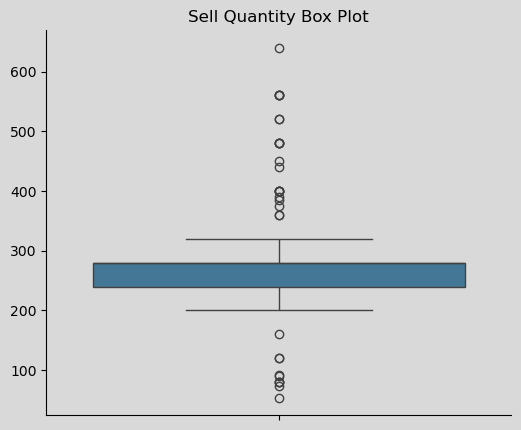

In [394]:
PlotBoxPlotV3_y(sell_df['sell_quantity'], "Sell Quantity Box Plot", 6, 5, "")

In [287]:
sell_df = IQR_Method(sell_df, 'sell_quantity')

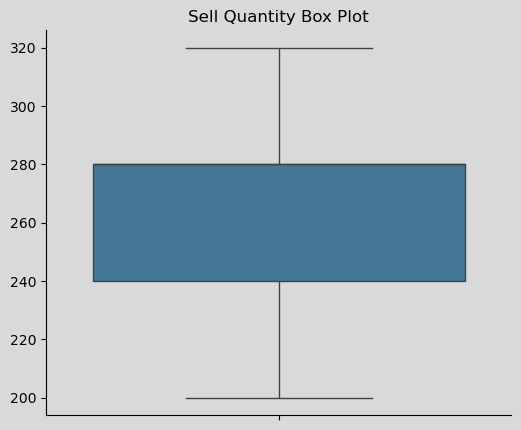

In [288]:
PlotBoxPlotV3_y(sell_df['sell_quantity'], "Sell Quantity Box Plot", 6, 5, "")

#### **1.2 Sell Value**

Although a few data points fall outside the interquartile range, the low standard deviation and the overall consistency of values suggest that no outlier treatment is required at this stage.

In [290]:
sell_df.describe(include = ['float', 'int'])[['sell_value']]

,sell_value
count,131.000000
mean,28.256489
std,1.372226
min,23.430000
25%,27.790000
50%,28.300000
75%,28.880000
max,32.100000


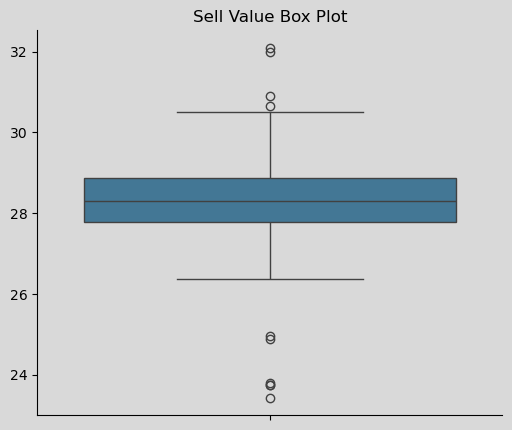

In [325]:
PlotBoxPlotV3_y(sell_df['sell_value'], "Sell Value Box Plot", 6, 5, "")

### **2. BUY_DF**

In [334]:
buy_df.describe(include = ['float', 'int'])

,buy_quantity,buy_value
count,385.000000,385.000000
mean,148.049351,34.896182
std,346.805203,3.074840
min,1.000000,4.880000
25%,53.000000,34.240000
50%,105.000000,35.330000
75%,164.000000,36.000000
max,4869.000000,41.600000


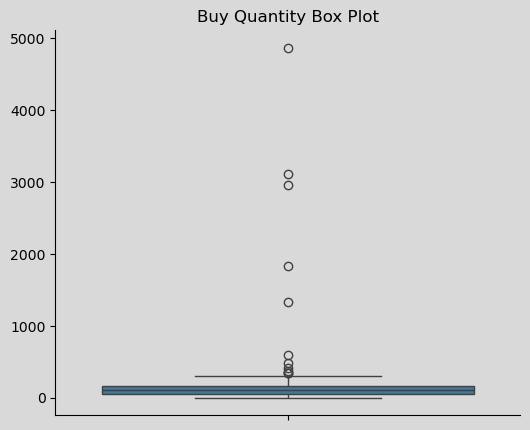

In [340]:
PlotBoxPlotV3_y(buy_df['buy_quantity'], "Buy Quantity Box Plot", 6, 5, "")

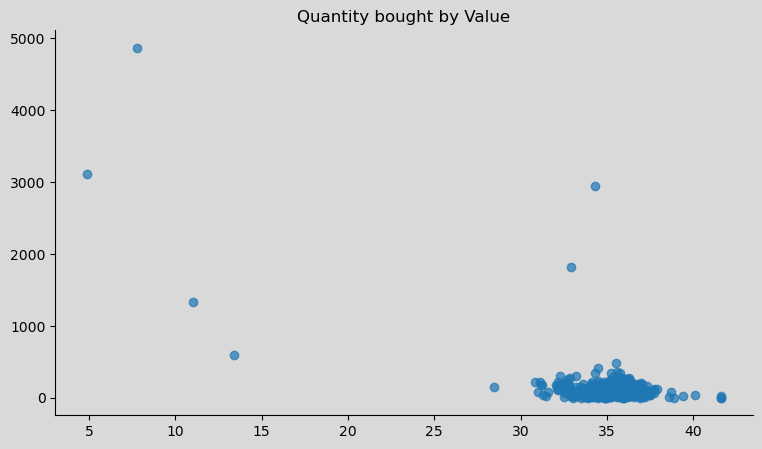

In [428]:
PlotScatter(buy_df['buy_value'], buy_df['buy_quantity'], "Quantity bought by Value", "", "", 9)

The initial box plot and scatter plot revealed extreme outliers in `buy_quantity`, some of which were linked to implausibly low purchase values.

Upon further inspection, it became clear that these records did not reflect valid business behavior. For instance, some purchases had a unit price below R$15.00, which is not realistic for cement.

To address this, we applied a filter to remove records with:
- `buy_value` below R$30.00;
- `buy_quantity` above 1000 units.

After this cleaning step, the distribution of purchase quantities became much more consistent and representative of typical purchasing patterns.


In [438]:
buy_df = buy_df[(buy_df['buy_value'] > 30) & (buy_df['buy_quantity'] < 1000)]

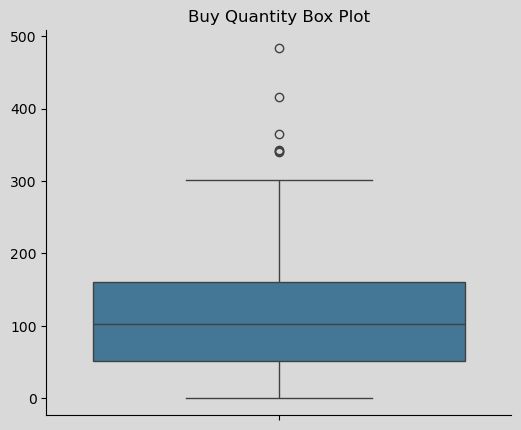

In [440]:
PlotBoxPlotV3_y(buy_df['buy_quantity'], "Buy Quantity Box Plot", 6, 5, "")

In [444]:
buy_df.describe(include = ['float', 'int'])

,buy_quantity,buy_value
count,378.000000,378.000000
mean,111.534392,35.191296
std,78.619624,1.530459
min,1.000000,30.800000
25%,51.500000,34.342500
50%,103.000000,35.360000
75%,161.000000,36.035000
max,484.000000,41.600000


### **3. INVENTORY_DF**

In [448]:
inventory_df.describe(include = ['float', 'int'])

,daily_balance,inventory
count,486.000000,486.000000
mean,23.393004,6402.197531
std,325.100860,3732.160048
min,-585.000000,58.000000
25%,-71.000000,3056.500000
50%,1.000000,3987.000000
75%,82.750000,11126.000000
max,4869.000000,11828.000000


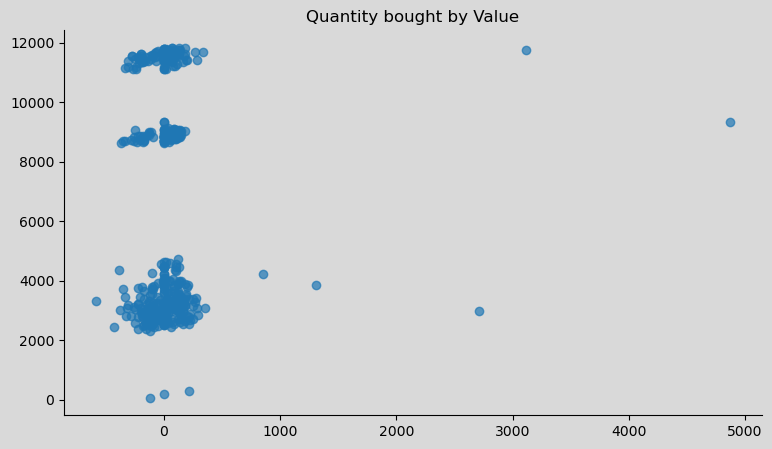

In [450]:
PlotScatter(inventory_df['daily_balance'], inventory_df['inventory'], "Quantity bought by Value", "", "", 9)

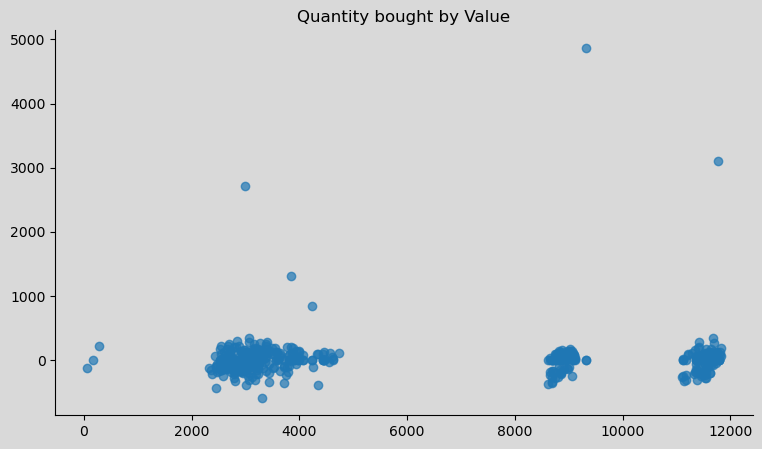

In [452]:
PlotScatter(inventory_df['inventory'], inventory_df['daily_balance'], "Quantity bought by Value", "", "", 9)

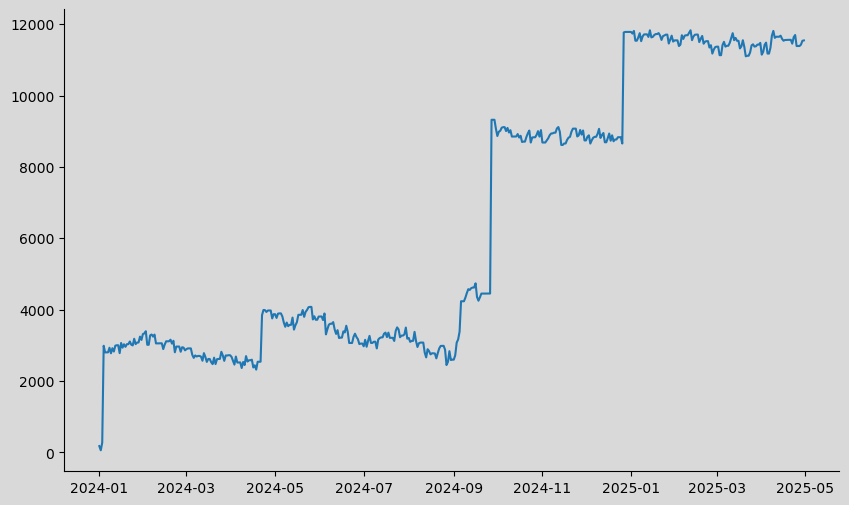

In [464]:
PlotLine(inventory_df['date'], inventory_df['inventory'], "", "", 10, 6)

## **DATA CONSOLIDATION**

### **sell_df**

In [ ]:
sell_df = sell_df.drop('product', axis = 1)
sell_df.head()

In [ ]:
i = {'quantity':'sell_quantity', 'value':'sell_value'}
sell_df_agg = sell_df.groupby('date').agg({'quantity': 'sum', 'value': 'mean'}).rename(columns = i)
sell_df_agg = sell_df_agg.astype({'sell_quantity':'int64'})
sell_df_agg['sell_value'] = np.round(sell_df_agg['sell_value'], decimals = 2)
sell_df_agg

### **buy_df**

In [ ]:
buy_df = buy_df.drop('product', axis = 1)
buy_df.head()

In [ ]:
i = {'quantity':'buy_quantity', 'value':'buy_value','final_value':'buy_final_value'}
buy_df_agg = buy_df.groupby('date').agg({'quantity': 'sum', 'value': 'mean', 'final_value': 'mean'}).rename(columns = i)
buy_df_agg = buy_df_agg.astype({'buy_quantity':'int64'})
buy_df_agg['buy_value'] = np.round(buy_df_agg['buy_value'], decimals = 2)
buy_df_agg['buy_final_value'] = np.round(buy_df_agg['buy_final_value'], decimals = 2)
buy_df_agg

### **CONSOLIDATE DATAFRAME**

In [ ]:
df = pd.date_range(start = '2024-01-01', end = '2025-04-30', freq = 'D')
df = pd.DataFrame({'date': df})

df = df.merge(sell_df_agg, on = 'date', how = 'left') \
        .merge(buy_df_agg, on = 'date', how = 'left') \
        .merge(weather_df, on = 'date', how = 'left') \
        .merge(inflation_df, on = 'date', how = 'left') \
        .merge(holidays_df, on = 'date', how = 'left')

In [ ]:
df

In [ ]:
df = df.fillna(0)
df.info()

In [ ]:
df = df.astype({'sell_quantity':'int64', 'buy_quantity':'int64'})
df

# **SAVING PROCESSED DATASET**

In [ ]:
df.to_csv('../data/processed/01_Data_Cleaning.csv', index = False)